In [4]:
import pandas as pd

In [22]:
headers = pd.read_csv('../Data/handles-data.csv')
tweets = pd.read_csv('../Data/tweets-data.csv')
union = pd.read_csv('../Data/union.csv', sep=";")
pd.options.display.float_format = '{:.2f}'.format

/home/julianmelero/twitter-ai/twai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/julianmelero/twitter-ai/twai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Variables Independientes para el Modelo

In [6]:
union["have_urls"] = union["urls"] != "[]"
union["have_video"] = union["video"] != 0
union["have_photos"] = union["urls"] != "[]"
union["have_hashtags"] = union["hashtags"] != "[]"
union["large_bio"] = union["bio"].str.len() >= 90


In [7]:
union[['have_urls', 'have_video']]
union[['have_urls', 'have_photos']].corr()

,have_urls,have_photos
have_urls,1.00,1.00
have_photos,1.00,1.00


In [8]:
union["large_bio"].value_counts()
union[union['bio'].str.len() >= 100].count()

id_x                19011
name_x              19011
username            19011
bio                 19011
url                 17117
join_datetime       19011
join_date           19011
join_time           19011
tweets              19011
location            14153
following           19011
followers           19011
likes               19011
media               19011
private             19011
verified            19011
avatar              19011
background_image    18960
id_y                19011
conversation_id     19011
created_at          19011
date                19011
timezone            19011
place                   9
tweet               19011
language            19011
hashtags            19011
cashtags            19011
user_id             19011
user_id_str         19011
name_y              19011
day                 19011
hour                19011
link                19011
urls                19011
photos              19011
video               19011
thumbnail            3957
retweet     

In [9]:
print(tweets.columns.tolist())

['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']


In [10]:
tweets['name']

0         Michelle Obama
1             KATY PERRY
2             KATY PERRY
3             KATY PERRY
4             KATY PERRY
              ...       
40576    Nana Akufo-Addo
40577    Nana Akufo-Addo
40578    Nana Akufo-Addo
40579    Nana Akufo-Addo
40580    Nana Akufo-Addo
Name: name, Length: 40581, dtype: object

In [11]:
print(headers.columns.tolist())

['id', 'name', 'username', 'bio', 'url', 'join_datetime', 'join_date', 'join_time', 'tweets', 'location', 'following', 'followers', 'likes', 'media', 'private', 'verified', 'avatar', 'background_image']


## Día de la semana

La fecha está en formato string como podemos observar

In [12]:
tweets['date'][0]

'2021-08-12 00:52:14'

Podemos convertir ese string en formato fecha, para así poder obtener el día de la semana

In [13]:
from datetime import datetime
print(datetime.strptime(tweets['date'][0], '%Y-%m-%d %H:%M:%S').isoweekday())

4


In [14]:
tweets['date'].isnull().sum()

0

In [15]:
def calcular_dia(fecha):
    return datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').isoweekday()

tweets['dia_semana'] = tweets['date'].aggregate([calcular_dia])
tweets



,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,dia_semana
0,1425590913959612419,1425590913959612419,1628722334000.00,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],...,NaN,1047165448008228864.00,We're so proud of the four organizations in ou...,1425589589272678400.00,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,4
1,1427736867739299841,1427736867739299841,1629233969000.00,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
2,1427667300488937476,1427667300488937476,1629217383000.00,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],...,NaN,259725229.00,You are not your job.,1427647879246667776.00,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN,2
3,1427667012105371652,1427667012105371652,1629217315000.00,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
4,1427497703596990467,1427497703596990467,1629176948000.00,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40576,1427593440469061634,1427593440469061634,1629199774000.00,2021-08-17 13:29:34,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
40577,1427592955272089642,1427592930722820096,1629199658000.00,2021-08-17 13:27:38,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
40578,1427592942441598980,1427592930722820096,1629199655000.00,2021-08-17 13:27:35,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2
40579,1427592930722820096,1427592930722820096,1629199652000.00,2021-08-17 13:27:32,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2


In [16]:
tweets['dia_semana'].value_counts().sort_index()


1    5624
2    6092
3    7145
4    6343
5    6550
6    4509
7    4318
Name: dia_semana, dtype: int64

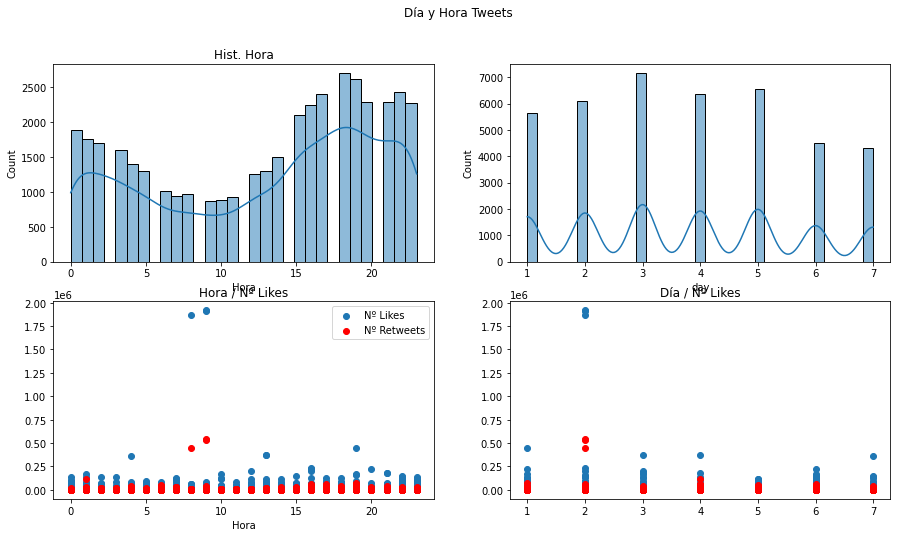

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

figura = plt.figure(figsize=(15,8))
figura.suptitle("Día y Hora Tweets")

axes = figura.add_subplot(2,2,1)
axes2 = figura.add_subplot(2,2,2)
axes3 = figura.add_subplot(2,2,3)
axes4 = figura.add_subplot(2,2,4)

axes.set_title("Hist. Hora")
axes.set_xlabel("Hora")
sns.histplot(x=tweets['hour'],ax=axes, kde=True)


sns.histplot(x=tweets['day'],ax=axes2, kde=True)

axes3.set_title("Hora / Nº Likes")
axes3.set_xlabel("Hora")
axes3.scatter(tweets['hour'].values, tweets['nlikes'].values, label="Nº Likes")
axes3.scatter(tweets['hour'].values, tweets['nretweets'].values, color="red", label="Nº Retweets")
axes3.legend()

axes4.set_title("Día / Nº Likes")
axes4.scatter(tweets['day'].values, tweets['nlikes'].values)
axes4.scatter(tweets['day'].values, tweets['nretweets'].values, color="red")

In [18]:
print(tweets.columns.tolist())

['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'dia_semana']


In [19]:
tweets['timezone'].value_counts()

200    40581
Name: timezone, dtype: int64

In [23]:
figura = plt.figure(figsize=(15,8))

axes = figura.add_subplot(2,2,1)
sns.histplot(x=tweets['nretweets'],ax=axes, kde=True)